In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Explore data

In [21]:
RAV = r"RAV\audio_speech_actors_01-24"

In [22]:
dir_list = os.listdir(RAV)
dir_list.sort()

In [23]:
emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir("{}\{}".format(RAV, i))
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)


In [24]:
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_surprise       96
female_happy        96
female_sad          96
female_angry        96
female_fear         96
female_disgust      96
female_surprise     96
Name: labels, dtype: int64

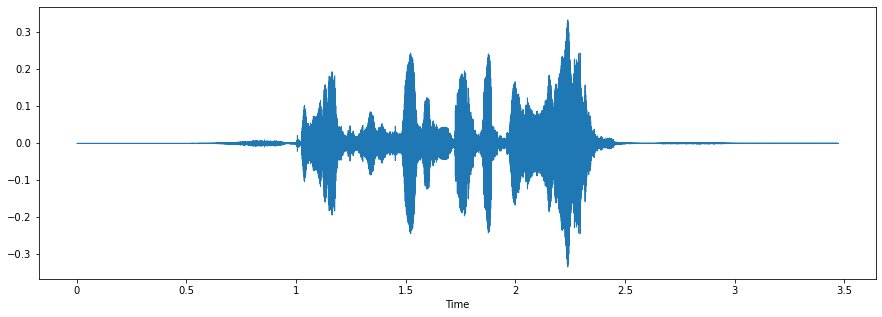

In [25]:
# Pick a fearful track
fname = RAV + '\Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

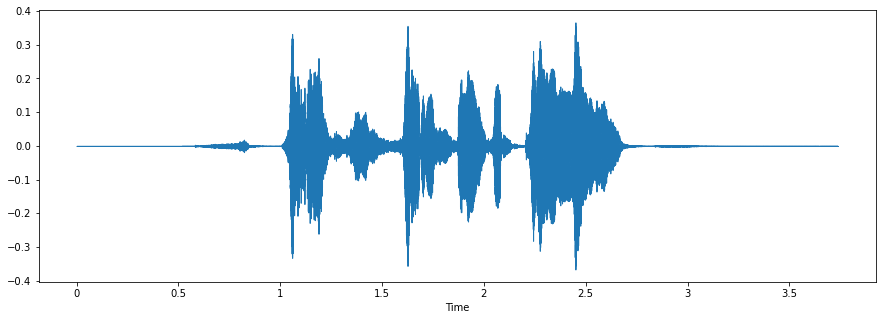

In [26]:
# Pick a happy track
fname = RAV + '\Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

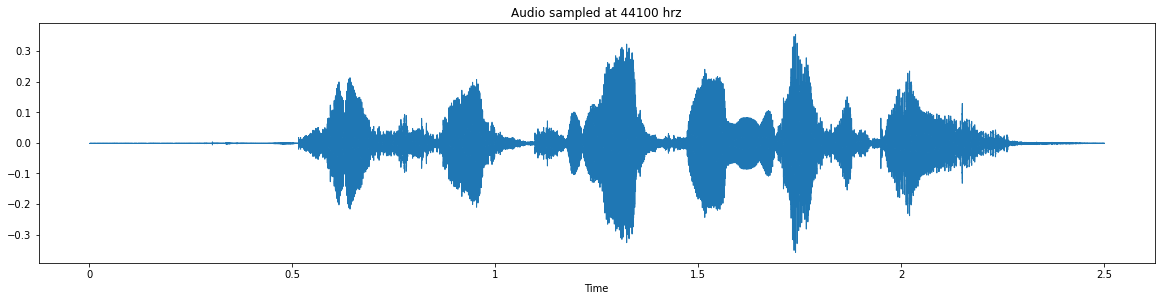

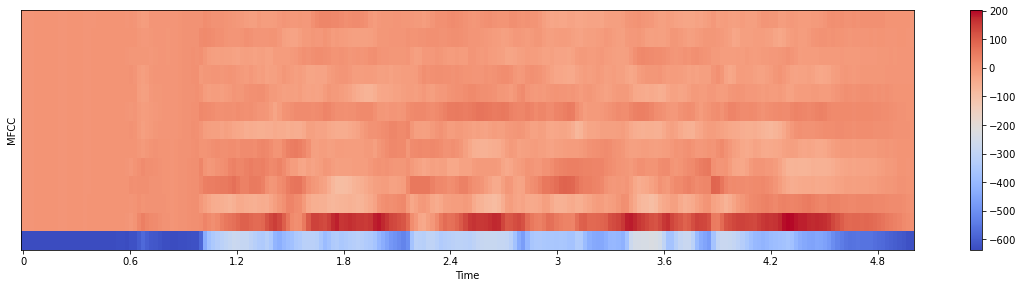

In [27]:
path = "RAV/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

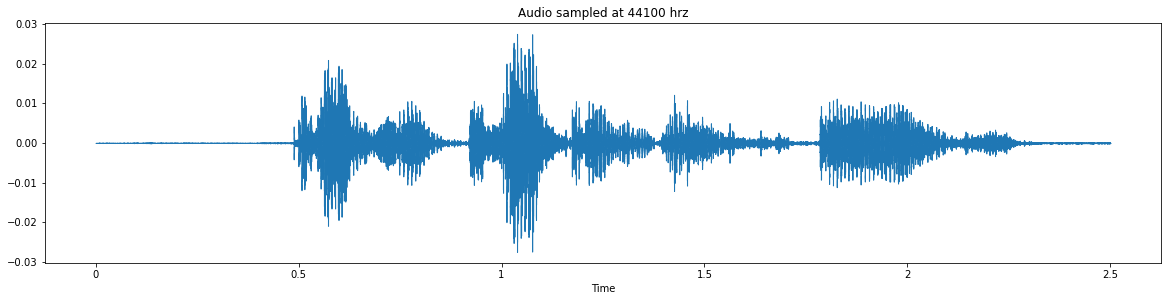

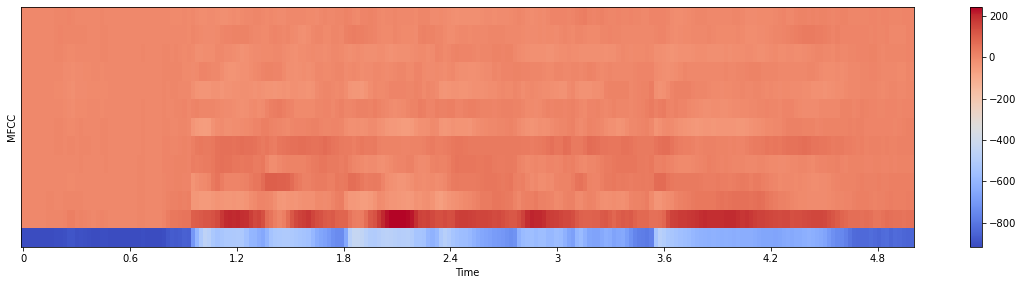

In [28]:
path = "RAV/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


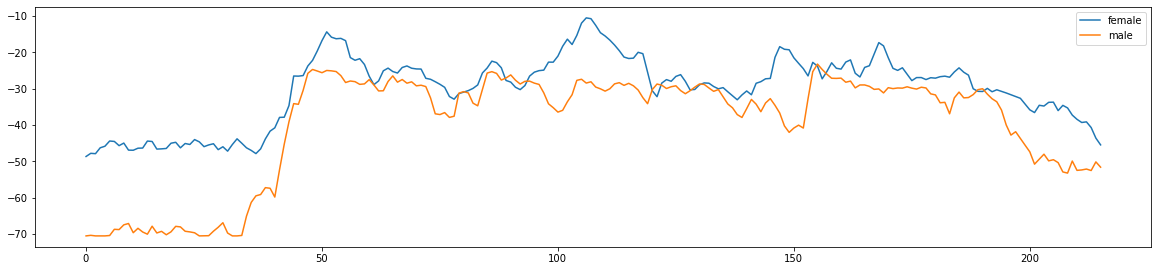

In [29]:
path = "RAV/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "RAV/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [30]:
path = 'RAV'
lst = []

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        file = file[6:8]
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue   

In [31]:
X, y = zip(*lst)

In [32]:
X = np.asarray(X)
y = np.asarray(y)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
predictions = dtree.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          01       0.71      0.62      0.66        73
          02       0.75      0.82      0.78       124
          03       0.73      0.70      0.71       135
          04       0.74      0.85      0.79       109
          05       0.83      0.77      0.80       112
          06       0.84      0.86      0.85       133
          07       0.78      0.79      0.78       133
          08       0.85      0.77      0.81       132

    accuracy                           0.78       951
   macro avg       0.78      0.77      0.77       951
weighted avg       0.78      0.78      0.78       951



## TESS Dataset Neural Network

In [39]:
for dirname, _, filenames in os.walk(r"TESS"): 
    for filename in filenames: 
        print(os.path.join(dirname, filename))

    break

In [40]:
import seaborn as sns

In [41]:
paths = []
labels = []
for dirname, _, filenames in os.walk("TESS"): 
    for filename in filenames: 
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())


In [42]:
df = pd.DataFrame()
df['speech'] = paths 
df['label'] = labels
df.head()

,speech,label
0,TESS\OAF_angry\OAF_back_angry.wav,angry
1,TESS\OAF_angry\OAF_bar_angry.wav,angry
2,TESS\OAF_angry\OAF_base_angry.wav,angry
3,TESS\OAF_angry\OAF_bath_angry.wav,angry
4,TESS\OAF_angry\OAF_bean_angry.wav,angry


In [43]:
df['label'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

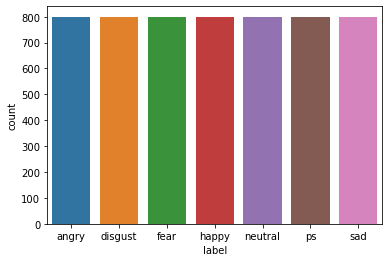

In [44]:
sns.countplot(df['label'])

In [45]:
def waveplot(data, sr, emotion): 
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr)
    plt.show()

def spectogram(data, sr, emotion): 
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [46]:
emotion = 'sad'
path = df['speech'][df['label']==emotion]

In [47]:
for p in path: 
    p0 = p
    break

In [48]:
data, sampling_rate = librosa.load(p0)

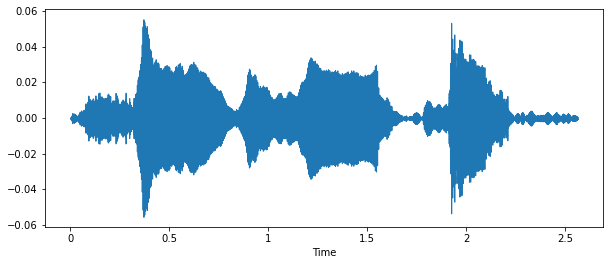

(array([[1.50263851e-04, 5.02268968e-06],
        [2.04525881e-03, 2.99854232e-04],
        [4.11739816e-03, 7.06137091e-03],
        ...,
        [2.08584809e-13, 1.24221353e-14],
        [6.89608966e-13, 3.35863225e-14],
        [3.05842725e-13, 1.94215323e-14]]),
 array([0.00000000e+00, 9.07029478e-05, 1.81405896e-04, ...,
        9.99818594e-01, 9.99909297e-01, 1.00000000e+00]),
 array([ 5512.5, 16473.5]),
 <matplotlib.image.AxesImage at 0x1a05762f6d0>)

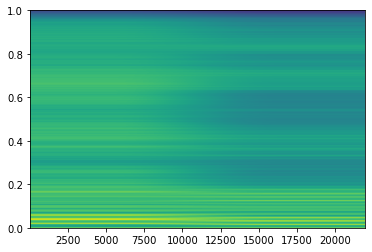

In [49]:
waveplot(data, sample_rate, emotion)
specgram(data, sample_rate)

In [50]:
from IPython.display import Audio

In [51]:
Audio(p0)

In [52]:
def extract_mfcc(filename): 
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [53]:
extract_mfcc(df['speech'][0])

array([-3.97214874e+02,  7.77846832e+01, -1.99478245e+01, -2.13016663e+01,
       -2.47878623e+00,  1.04415865e+01, -2.07168369e+01, -5.74857569e+00,
       -7.55554676e+00, -2.10370615e-01, -2.18025589e+00,  5.51623166e-01,
        3.94573897e-01,  1.64459980e+00,  2.57582307e+00,  3.15656734e+00,
       -5.01067924e+00, -4.14153576e+00, -1.90491128e+00, -9.96853924e+00,
       -7.81200552e+00, -1.55172932e+00, -7.26189518e+00,  9.65194511e+00,
        8.14204407e+00,  2.19211063e+01,  1.90227432e+01,  2.05200424e+01,
        1.32593021e+01,  8.48793125e+00,  2.54911691e-01,  5.23840904e+00,
        9.45089054e+00,  5.56163883e+00,  2.41641927e+00, -1.74867535e+00,
        4.80002546e+00,  9.37272930e+00,  2.04265833e+00, -1.87645078e+00],
      dtype=float32)

In [54]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [55]:
len(X_mfcc[0])

40

In [56]:
X = np.expand_dims(X_mfcc, 1)
X.shape

(5600, 1)

In [57]:
X = [None for _ in range(X_mfcc.shape[0])]
for ind, val in enumerate(X_mfcc): 
    X[ind] = val

In [58]:
X = np.asarray(X)

In [59]:
X.shape

(5600, 40)

In [60]:
X = np.expand_dims(X, 1)

In [61]:
X = np.reshape(X, (5600, 40, 1))

In [62]:
y.shape

(2880,)

In [63]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [64]:
y = y.toarray()

In [65]:
y.shape

(5600, 7)

In [73]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


In [74]:
model = Sequential([
    LSTM(123, input_shape=(40, 1), return_sequences=False), 
    Dense(64, activation="relu"), 
    Dropout(0.2), 
    Dense(32, activation="relu"), 
    Dropout(0.2), 
    Dense(7, activation="softmax")
]

)

In [75]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [77]:
history = model.fit(X, y, validation_split=0.2, epochs = 100, batch_size = 512, shuffle=True)

Epoch 1/100
9/9 [==============================] - 3s 221ms/step - loss: 1.8790 - accuracy: 0.2464 - val_loss: 1.8469 - val_accuracy: 0.1562
Epoch 2/100
9/9 [==============================] - 1s 171ms/step - loss: 1.5804 - accuracy: 0.4225 - val_loss: 1.5235 - val_accuracy: 0.4018
Epoch 3/100
9/9 [==============================] - 2s 178ms/step - loss: 1.2687 - accuracy: 0.5391 - val_loss: 1.0510 - val_accuracy: 0.6009
Epoch 4/100
9/9 [==============================] - 1s 159ms/step - loss: 0.9997 - accuracy: 0.6225 - val_loss: 0.6970 - val_accuracy: 0.7018
Epoch 5/100
9/9 [==============================] - 1s 162ms/step - loss: 0.7474 - accuracy: 0.7154 - val_loss: 0.4743 - val_accuracy: 0.7893
Epoch 6/100
9/9 [==============================] - 1s 150ms/step - loss: 0.6054 - accuracy: 0.7679 - val_loss: 0.4312 - val_accuracy: 0.7946
Epoch 7/100
9/9 [==============================] - 1s 165ms/step - loss: 0.4862 - accuracy: 0.8252 - val_loss: 0.3211 - val_accuracy: 0.9107
Epoch 8/100
9

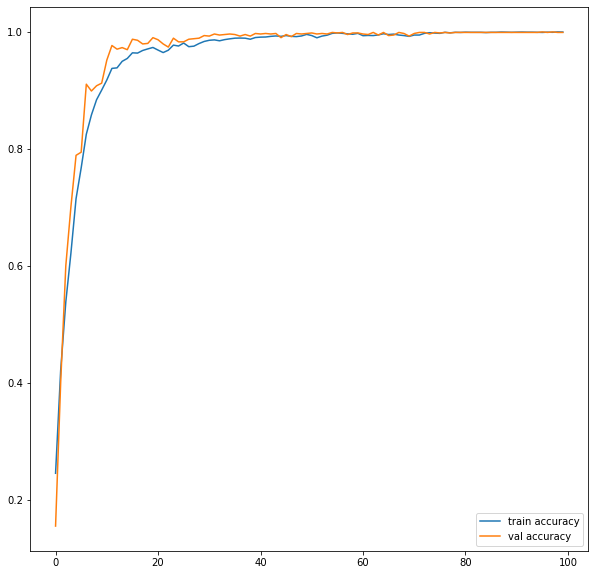

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

figure = plt.figure(figsize=(10, 10))
plt.plot(range(100), acc, label='train accuracy')
plt.plot(range(100), val_acc, label='val accuracy')
plt.legend()
plt.show()